# Segmentation

This module will demonstrate how to seperate the image into smaller images of the clusters. The pipeline performs the following operations:
    
    - Load image.
    - Convert image to grayscale.
    - Convert image to binary.
    - Convert image to set.
    - Dilate image by factor x.
    - For all foreground pixels find connected pixels as new set with flood fill algorithm.
    - Get boundary boxes.
    - Extract subimages.
    - Write subimages to disk.

In [1]:
# Import the image processing library.
import modules.oiplib as oiplib
import numpy as np

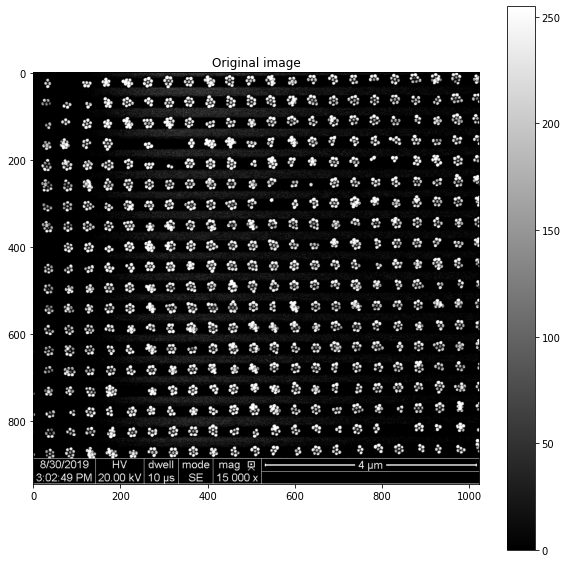

In [2]:
# Load the image.
grayImg = oiplib.loadImage('../images/heptamers.tiff')
oiplib.showImage(grayImg, "Original image", figsize=10);

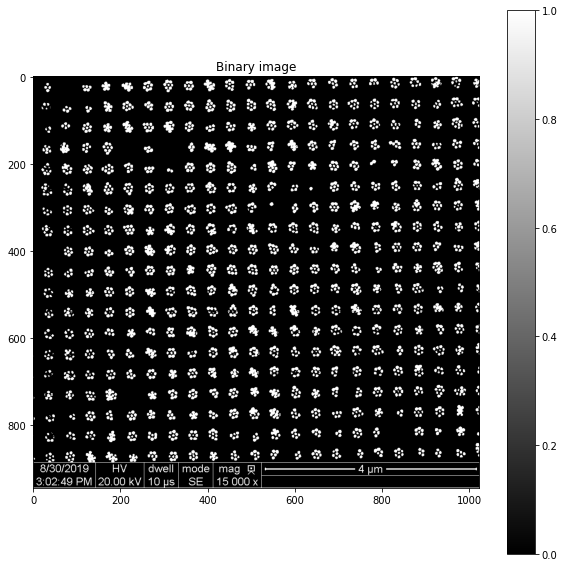

In [3]:
# Convert grayscale image to binary image.
binImg = oiplib.gray2Binary(grayImg)
oiplib.showImage(binImg, "Binary image", figsize=10, vmax=1);

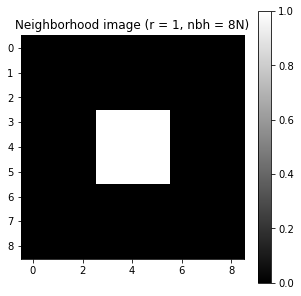

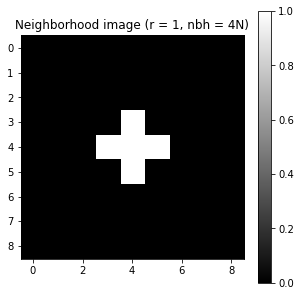

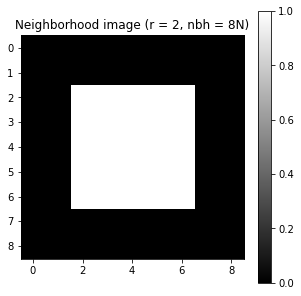

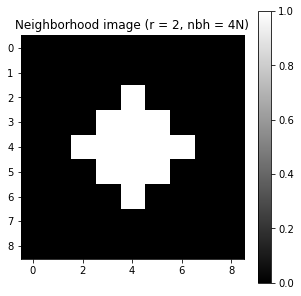

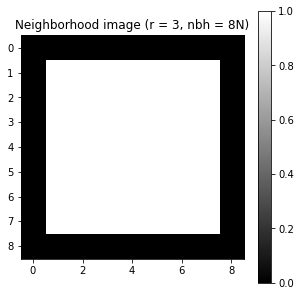

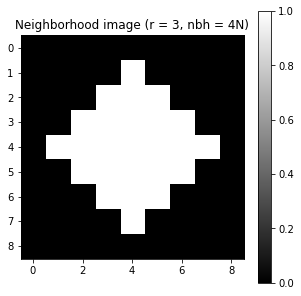

In [4]:
# Examples for how to generate explicit structuring elements for a given center coordinate.
se0 = oiplib.createStructuringElement(1, "8N")((4, 4))
oiplib.showImage(oiplib.set2Binary(se0), "Neighborhood image (r = 1, nbh = 8N)", figsize=5, vmax=1);

se1 = oiplib.createStructuringElement(1, "4N")((4, 4))
oiplib.showImage(oiplib.set2Binary(se1), "Neighborhood image (r = 1, nbh = 4N)", figsize=5, vmax=1);

se2 = oiplib.createStructuringElement(2, "8N")((4, 4))
oiplib.showImage(oiplib.set2Binary(se2), "Neighborhood image (r = 2, nbh = 8N)", figsize=5, vmax=1);

se3 = oiplib.createStructuringElement(2, "4N")((4, 4))
oiplib.showImage(oiplib.set2Binary(se3), "Neighborhood image (r = 2, nbh = 4N)", figsize=5, vmax=1);

se2 = oiplib.createStructuringElement(3, "8N")((4, 4))
oiplib.showImage(oiplib.set2Binary(se2), "Neighborhood image (r = 3, nbh = 8N)", figsize=5, vmax=1);

se3 = oiplib.createStructuringElement(3, "4N")((4, 4))
oiplib.showImage(oiplib.set2Binary(se3), "Neighborhood image (r = 3, nbh = 4N)", figsize=5, vmax=1);

4.0583025500000005 s


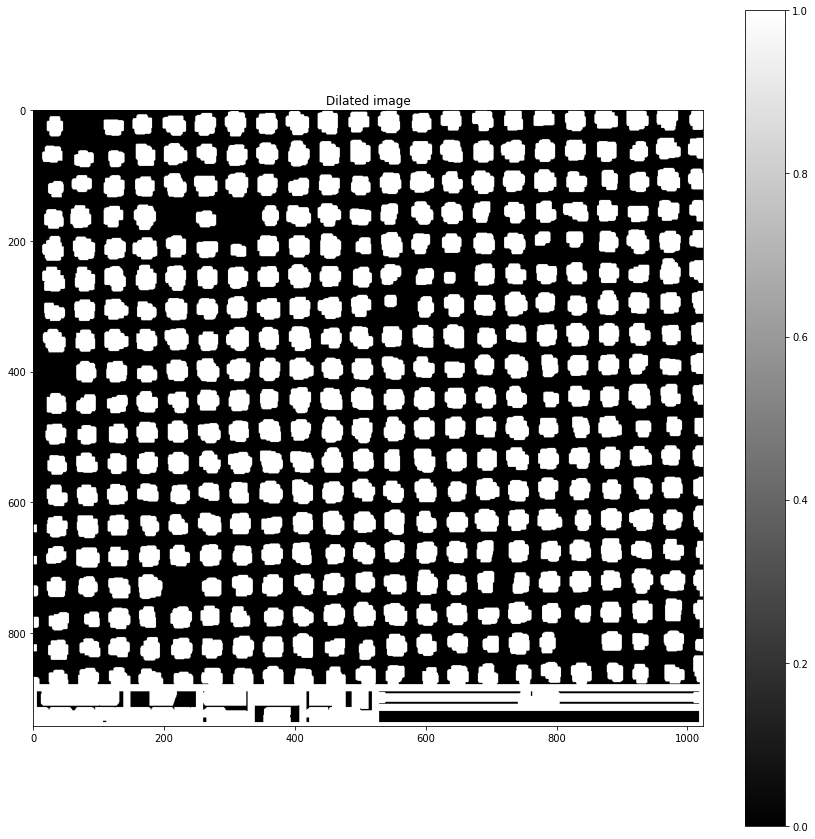

In [9]:
# Convert binary image to set.
setImg = oiplib.binary2Set(binImg)

# Import time library for performance testing.
import time

# Start performance timer.
start = time.process_time()

# Dilate set.
dilatedSetImg = oiplib.dilateSet(setImg, oiplib.createStructuringElement(5))
oiplib.showImage(oiplib.set2Binary(dilatedSetImg, binImg.shape), "Dilated image", figsize=15, vmax=1);

# Stop performance timer.
stop = time.process_time()
print(stop - start, "s")